### Question 1 - Extracting Tesla Stock Data Using yfinance

In [2]:
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract historical stock data
tesla_data = tesla.history(period="max")

# Reset the index and display the first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [3]:
import requests
from bs4 import BeautifulSoup
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
# Download and parse the webpage
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    # Append the data to the DataFrame
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([{"Date":date, "Revenue":revenue}])], ignore_index=True)
# Clean the revenue data
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
# Display the last 5 rows
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


### Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [4]:
# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical stock data
gme_data = gme.history(period="max")

# Reset the index and display the first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [5]:
# URL for GameStop's revenue data
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
# Download and parse the webpage
html_data_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_data_gme, 'html.parser')
# Create an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Find the table and extract data
for row in soup_gme.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame([{"Date":date, "Revenue":revenue}])], ignore_index=True)
# Clean the revenue data
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$',"", regex=True)
# Display the last 5 rows
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


### Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.
Upload a screenshot of your results.

In [6]:
# Call the make_graph function with the Tesla data
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def make_graph(stock_data, revenue_data, stock_name):  fig = make_subplots(rows=1, cols=1, shared_xaxes=True, specs=[[{"secondary_y": True}]])
    # Add stock data trace  fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], name="Share Price"), secondary_y=False)
    # Add revenue data trace fig.add_trace(go.Bar(x=revenue_data['Date'], y=revenue_data['Revenue'].astype(float), name="Revenue"), secondary_y=True)
    # Add titles and labels  fig.update_layout(
        title_text=f"{stock_name} Share Price vs. Revenue",
        xaxis_title="Date",
        yaxis_title="Stock Price ($)",
        yaxis2_title="Revenue ($ Millions)") fig.show()

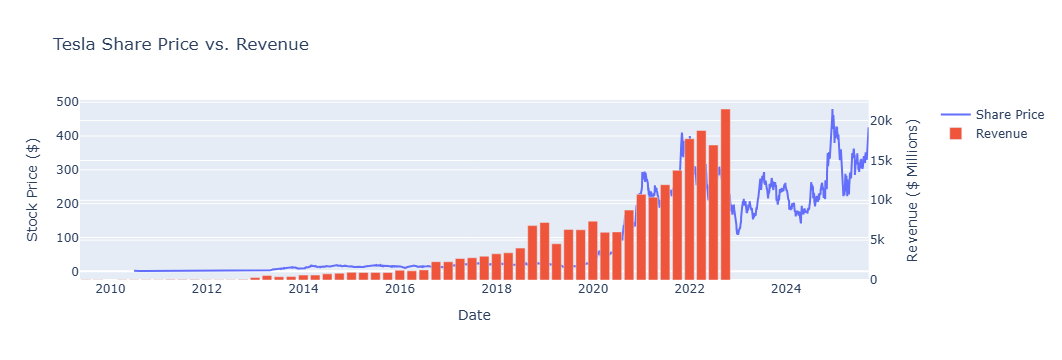

In [8]:
  make_graph(tesla_data, tesla_revenue, 'Tesla')

### Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.
Upload a screenshot of your results.

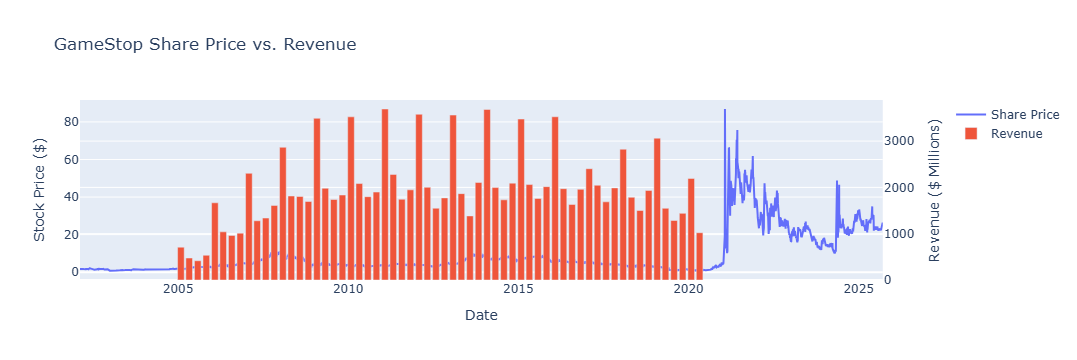

In [7]:
# Call the make_graph function with the GameStop data
make_graph(gme_data, gme_revenue, 'GameStop')